## FRUIT CLASSIFICATION USING CNN

### Importing Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.layers import Conv2D, Dropout, Dense, Flatten, MaxPooling2D, BatchNormalization
import cv2
import glob
import pathlib
import PIL

#### Getting the Path of the Images

In [2]:
data_dir = pathlib.Path("images/")
data_dir

WindowsPath('images')

In [3]:
Apple = list(data_dir.glob('apple fruit/*'))
Apple[:5]

[WindowsPath('images/apple fruit/Image_1.jpg'),
 WindowsPath('images/apple fruit/Image_10.jpg'),
 WindowsPath('images/apple fruit/Image_11.jpg'),
 WindowsPath('images/apple fruit/Image_12.jpg'),
 WindowsPath('images/apple fruit/Image_13.png')]

#### Displaying Random Image from the Directory

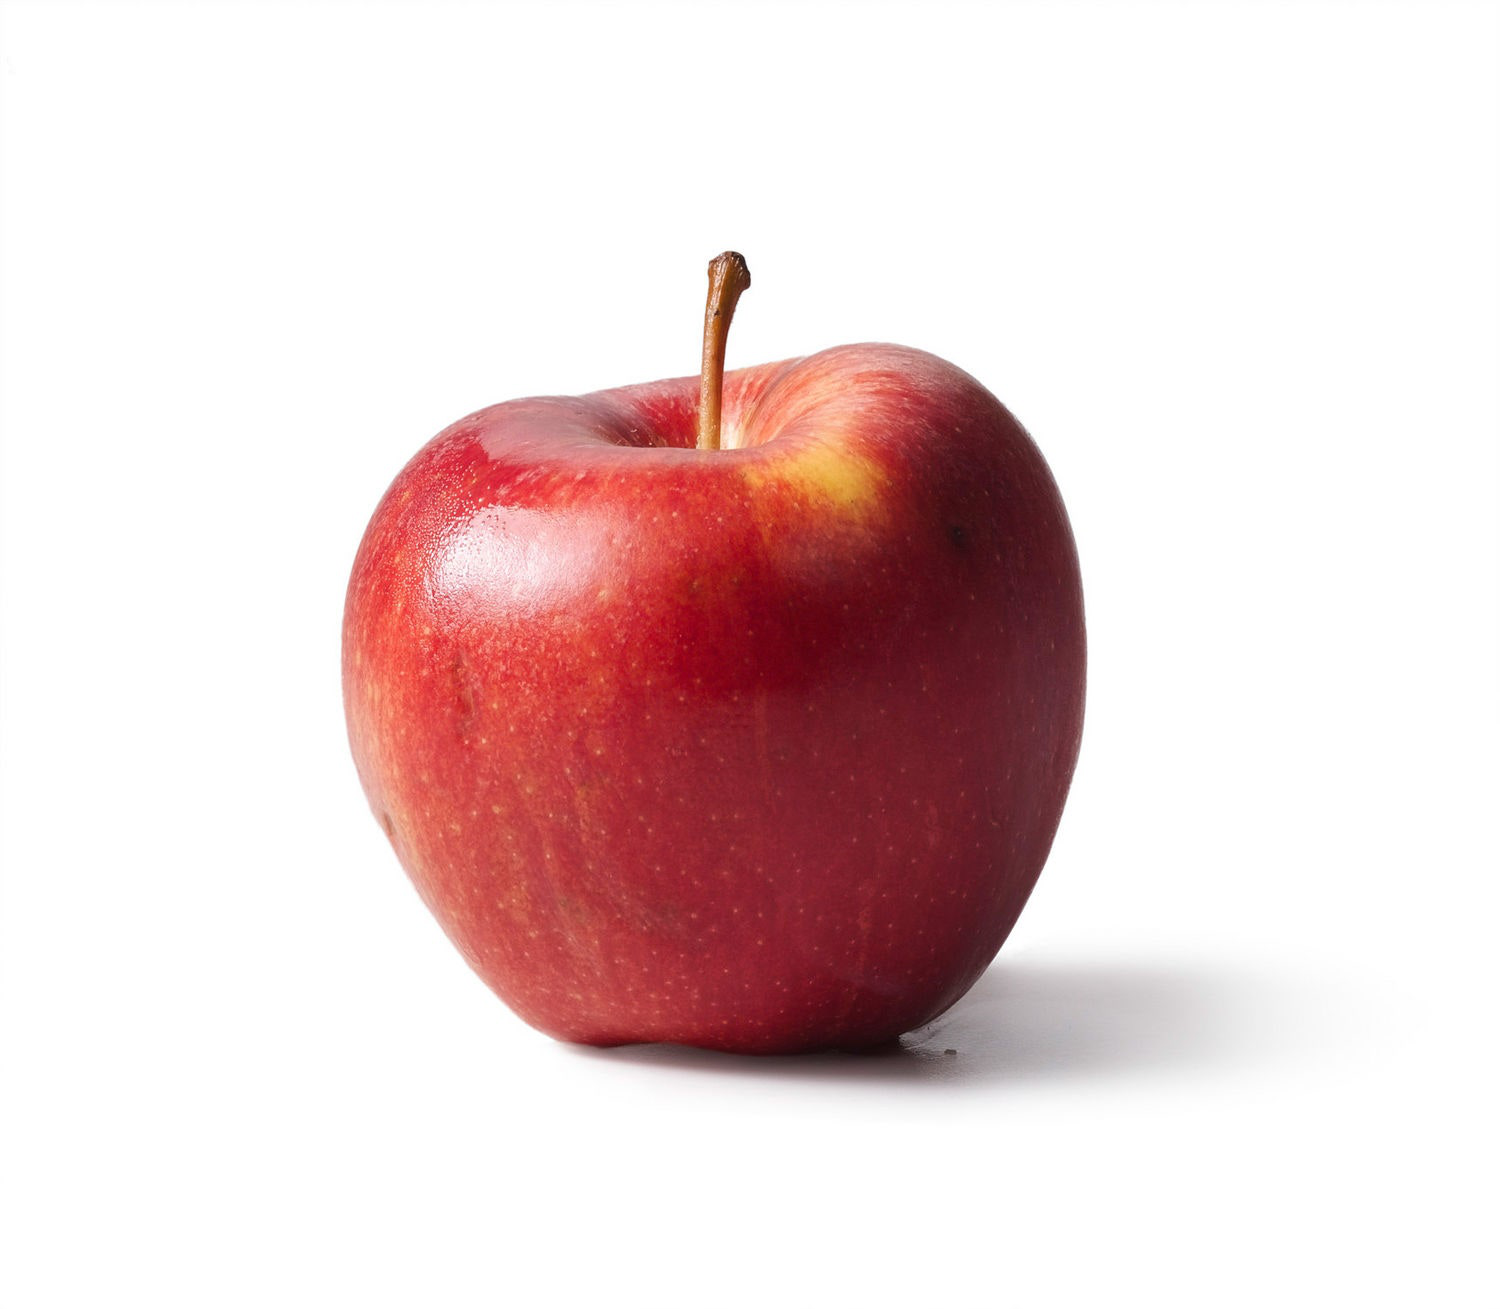

In [4]:
PIL.Image.open(str(Apple[1]))

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg'))+list(data_dir.glob('*/*.png')))
print(image_count)

340


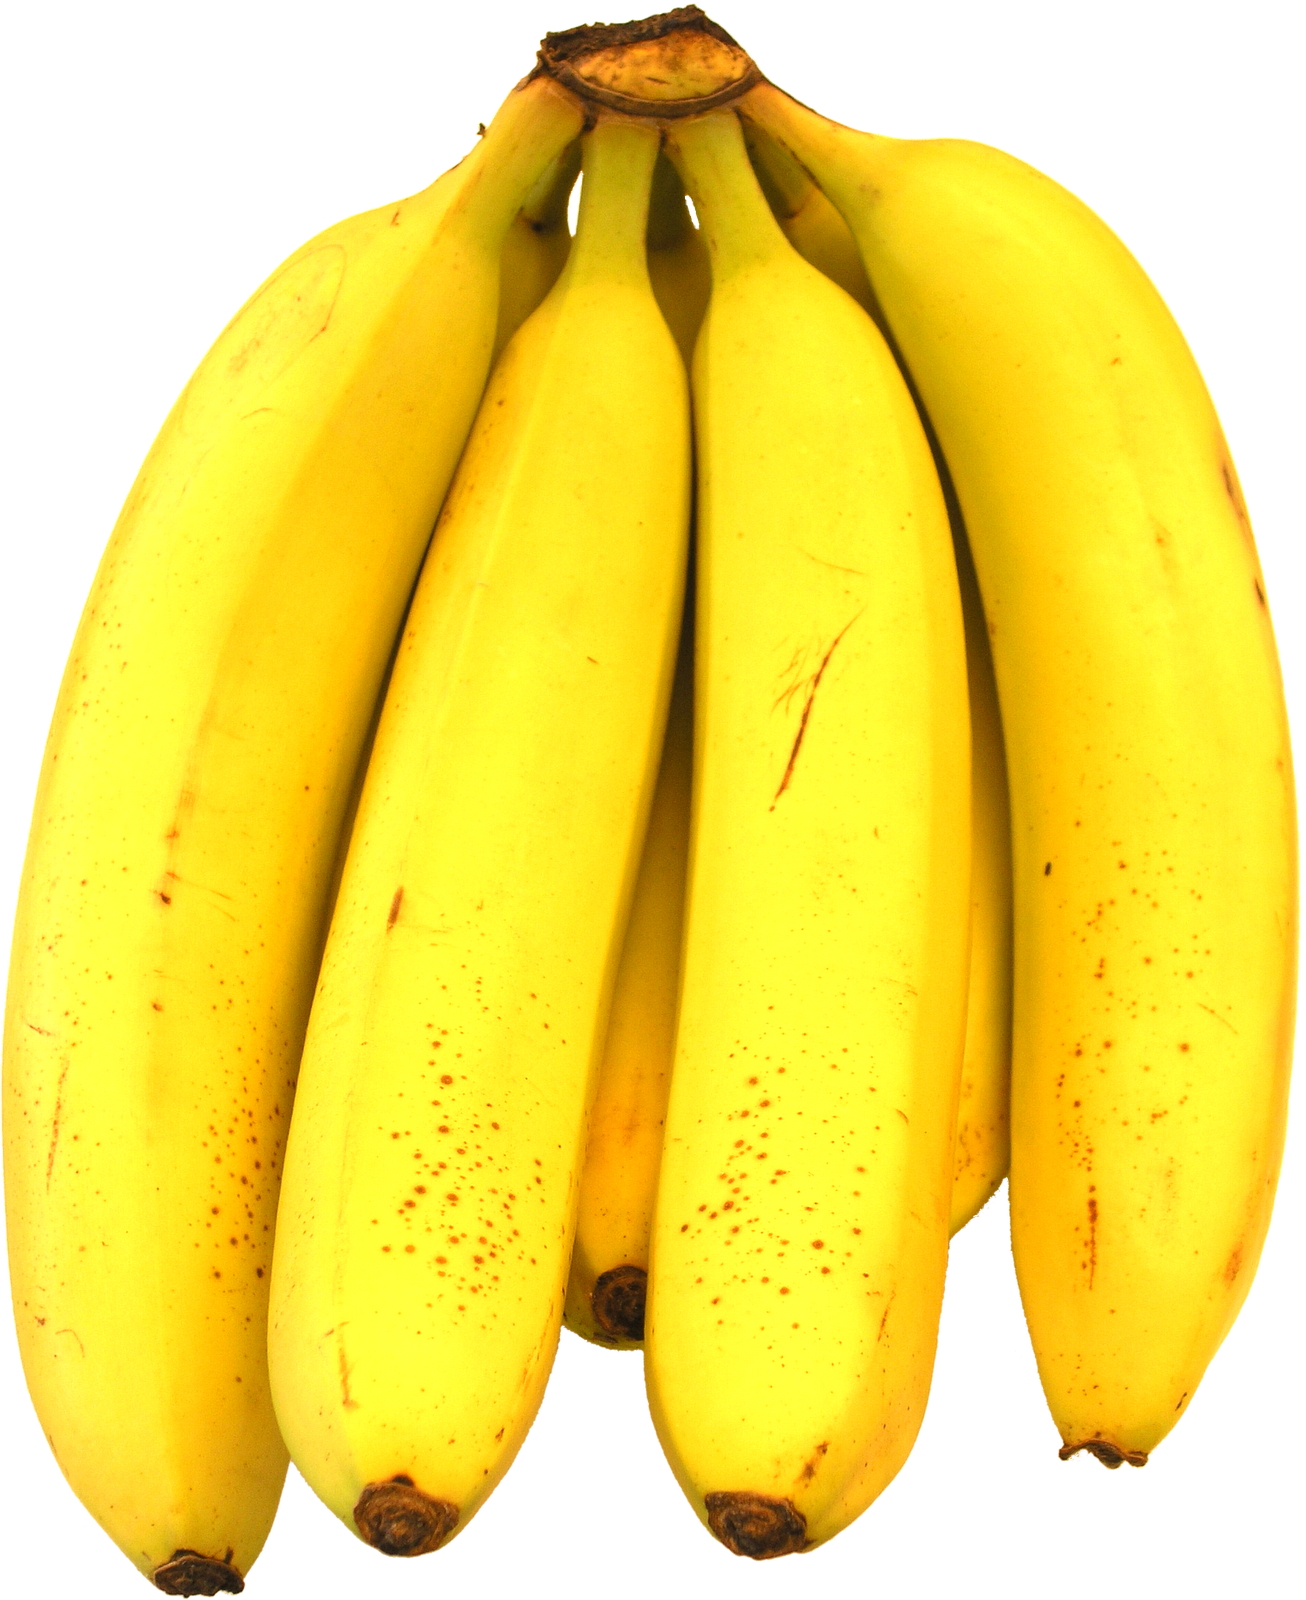

In [6]:
Banana = list(data_dir.glob('banana fruit/*'))
PIL.Image.open(str(Banana[1]))

#### Creating a Dictionary of the Images 

In [7]:
fruits_images_dict = {
    'Apple': list(data_dir.glob('apple fruit/*')),
    'Banana': list(data_dir.glob('banana fruit/*')),
    'Grape': list(data_dir.glob('grapes fruit/*')),
    'Mango': list(data_dir.glob('mango fruit/*')),
    'Strawberry': list(data_dir.glob('strawberry fruit/*')),
    'Cherry': list(data_dir.glob('cherry fruit/*')),
    'Chickoo': list(data_dir.glob('chickoo fruit/*')),
    'Kiwi': list(data_dir.glob('kiwi fruit/*')),
    'Orange': list(data_dir.glob('orange fruit/*')),
}

#### Labeling Each Class 

In [8]:
fruits_images_label = {
    'Apple': 0,
    'Banana': 1,
    'Grape': 2,
    'Mango': 3,
    'Strawberry': 4,
    'Cherry': 5,
    'Chickoo': 6,
    'Kiwi': 7,
    'Orange':8,
}

In [9]:
fruits_images_dict["Mango"][:5]

[WindowsPath('images/mango fruit/Image_1.jpg'),
 WindowsPath('images/mango fruit/Image_10.JPG'),
 WindowsPath('images/mango fruit/Image_11.jpg'),
 WindowsPath('images/mango fruit/Image_12.jpg'),
 WindowsPath('images/mango fruit/Image_13.gif')]

In [10]:
str(fruits_images_dict['Apple'][0])

'images\\apple fruit\\Image_1.jpg'

### Converting Images Into Numpy Array

In [11]:
X= [] 
y=[]

for name, images in fruits_images_dict.items():
    for image in images: 
        img = cv2.imread(str(image))
        resize = cv2.resize(img,(256,256))
        X.append(resize)
        y.append(fruits_images_label[name])

In [12]:
X = np.array(X)
y = np.array(y)

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Scaling the Data

In [14]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [15]:
X_train_scaled[0]

array([[[0.86666667, 0.86666667, 0.86666667],
        [0.86666667, 0.86666667, 0.86666667],
        [0.86666667, 0.86666667, 0.86666667],
        ...,
        [0.86666667, 0.86666667, 0.86666667],
        [0.86666667, 0.86666667, 0.86666667],
        [0.86666667, 0.86666667, 0.86666667]],

       [[0.86666667, 0.86666667, 0.86666667],
        [0.86666667, 0.86666667, 0.86666667],
        [0.86666667, 0.86666667, 0.86666667],
        ...,
        [0.86666667, 0.86666667, 0.86666667],
        [0.86666667, 0.86666667, 0.86666667],
        [0.86666667, 0.86666667, 0.86666667]],

       [[0.86666667, 0.86666667, 0.86666667],
        [0.86666667, 0.86666667, 0.86666667],
        [0.86666667, 0.86666667, 0.86666667],
        ...,
        [0.86666667, 0.86666667, 0.86666667],
        [0.86666667, 0.86666667, 0.86666667],
        [0.86666667, 0.86666667, 0.86666667]],

       ...,

       [[0.86666667, 0.86666667, 0.86666667],
        [0.86666667, 0.86666667, 0.86666667],
        [0.86666667, 0

### Building a Convolutional Neural Network 

In [16]:
model = keras.Sequential([
  Conv2D(16, 3, padding='same', activation='relu', input_shape = (256,256,3)),
  MaxPooling2D(),
    
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
    
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
    
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(9, activation = 'softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
              
model.summary()

C:\Users\Prasad\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,413,481 (32.09 MB)

 Trainable params: 8,413,481 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

### Training the CNN

In [17]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.3, epochs=10, verbose = 1)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.0417 - loss: 4.4754 - val_accuracy: 0.0685 - val_loss: 2.3628
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.1310 - loss: 2.2413 - val_accuracy: 0.2740 - val_loss: 2.1601
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.1726 - loss: 2.1251 - val_accuracy: 0.2192 - val_loss: 2.0647
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.2917 - loss: 1.9711 - val_accuracy: 0.4110 - val_loss: 1.9093
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step - accuracy: 0.4167 - loss: 1.6889 - val_accuracy: 0.3836 - val_loss: 1.7276
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.5417 - loss: 1.3743 - val_accuracy: 0.3425 - val_loss: 1.6897
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 0.6190 - loss: 1.1307 - val_accuracy: 0.3014 - val_loss: 1.7636
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step - accuracy: 0.6786 - loss: 0.9535 - val_accuracy: 0.3836 - val_loss:

### Evaluating on Test Data

In [18]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_scaled)
y_pred_classes = [np.argmax(i) for i in y_pred]
acc = accuracy_score(y_pred_classes,y_test)
print("Accuracy : ",acc)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step 
Accuracy :  0.5210084033613446


### Plotting Training and Testing Accuracy

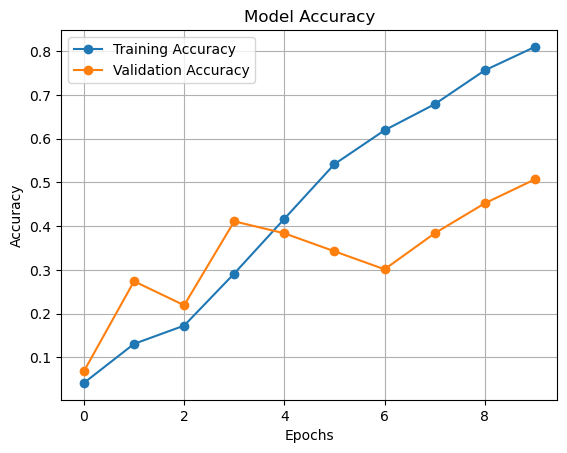

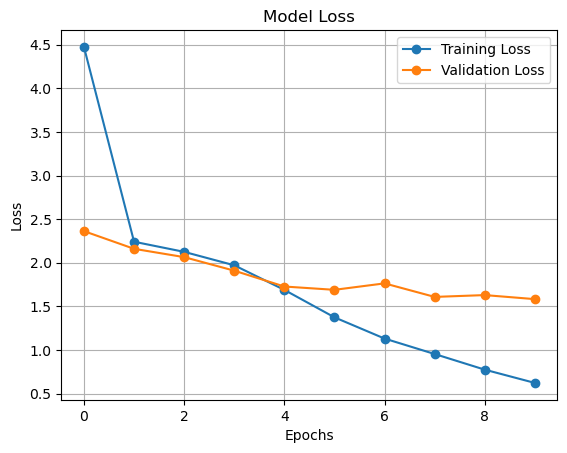

In [19]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss (optional)
plt.figure()
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### Performance Metrics

<Figure size 600x600 with 0 Axes>

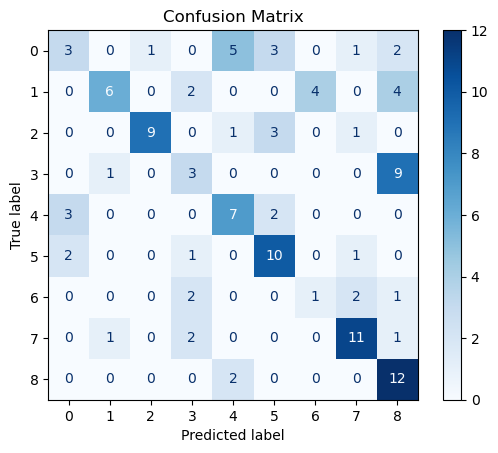

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


### Using a Pre-Trained CNN ( MobileNetV2 )

In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import RandomRotation, RandomZoom

base_model = MobileNetV2(include_top=False, weights='imagenet')
base_model.trainable = False  # freeze the base layers initially

model = keras.Sequential([
    RandomRotation(0.2,input_shape=(256,256,3)),
    RandomZoom(0.2),
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])

C:\Users\Prasad\AppData\Local\Temp\ipykernel_20980\3460590715.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights='imagenet')
C:\Users\Prasad\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.3,
    epochs=10
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2321 - loss: 10.7631 - val_accuracy: 0.6575 - val_loss: 2.4694
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 925ms/step - accuracy: 0.4524 - loss: 5.7042 - val_accuracy: 0.5890 - val_loss: 1.7167
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 925ms/step - accuracy: 0.6131 - loss: 2.0229 - val_accuracy: 0.6849 - val_loss: 1.2825
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 872ms/step - accuracy: 0.6071 - loss: 1.1900 - val_accuracy: 0.6575 - val_loss: 1.2056
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 843ms/step - accuracy: 0.6250 - loss: 1.0389 - val_accuracy: 0.6712 - val_loss: 1.1305
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 837ms/step - accuracy: 0.6964 - loss: 1.0301 - val_accuracy: 0.7260 - val_loss: 1.1095
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 840ms/step - accuracy: 0.6607 - loss: 0.9363 - val_accuracy: 0.7260 - val_loss: 1.1203
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 835ms/step - accuracy: 0.6667 - loss: 0.9626 - val_accuracy: 0.7534 - val_loss: 

### Evaluating on Test Data

In [24]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_scaled)
y_pred_classes = [np.argmax(i) for i in y_pred]
acc = accuracy_score(y_pred_classes,y_test)
print("Accuracy : ",acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 805ms/step
Accuracy :  0.7310924369747899


In [25]:
y_pred_classes[:5]

[np.int64(5), np.int64(1), np.int64(7), np.int64(7), np.int64(1)]

In [26]:
y_test[:5]

array([5, 1, 7, 7, 1])

### Plotting Train Test Accuracy

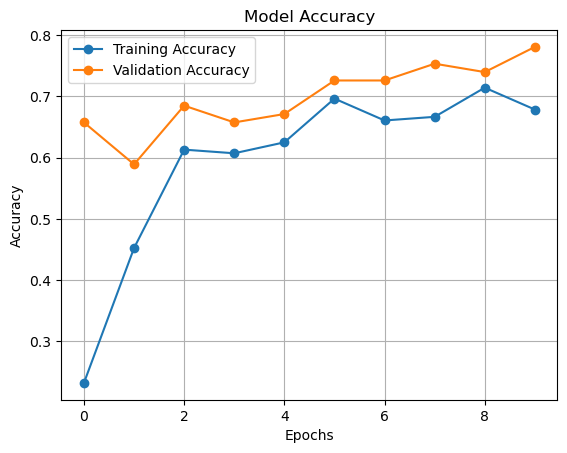

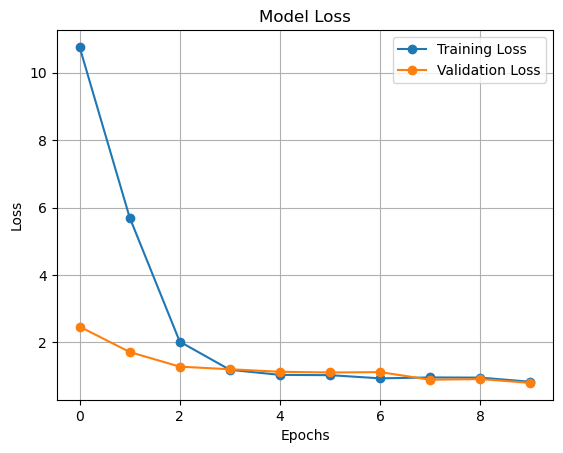

In [27]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss (optional)
plt.figure()
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### Performance Evaluation

<Figure size 600x600 with 0 Axes>

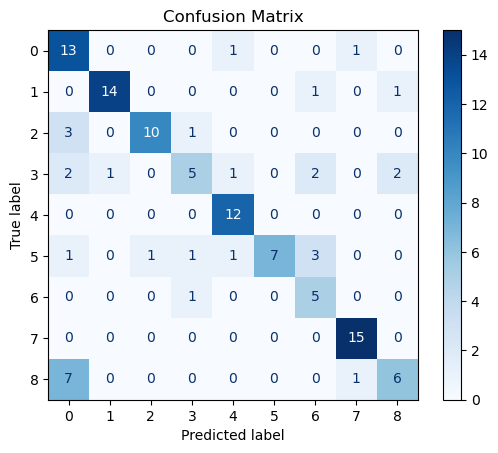

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

### Done